# Credit Card Churn Prediction


## Description
### Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

### Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank

### Data Dictionary:

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

## Importing libraries

In [211]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Loading Data

In [212]:
# Loading the dataset
bank_churn_data = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

In [213]:
# Checking the number of rows and columns in the data
bank_churn_data.shape

(10127, 21)

<IPython.core.display.Javascript object>

## Data Overview

In [214]:
data = bank_churn_data.copy()

<IPython.core.display.Javascript object>

In [215]:
# let's view the first 5 rows of the data
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

<IPython.core.display.Javascript object>

In [216]:
# let's view the last 5 rows of the data
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

<IPython.core.display.Javascript object>

In [217]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

- There are a total of 21 columns and 1,0127 observations in the dataset
- Total of 6 categorical columns and rest 15 numerical
- 2 columns - Education Level & Marital Status have missing data
- Attrition Flag is the target variable.
- Clientnum is index number and will be removed while building model.

In [218]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [219]:
# Checking for the null value in the dataset
data.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

- There are 2 categorical columns - Educational Level & Marital Status which has missing values which will be filled with modes later.

**Let's check the number of unique values in each column**

In [220]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

<IPython.core.display.Javascript object>

In [221]:
for col in data.select_dtypes("object"):
    print(data[col].unique())
    print(data[col].value_counts())

['Existing Customer' 'Attrited Customer']
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
['M' 'F']
F    5358
M    4769
Name: Gender, dtype: int64
['High School' 'Graduate' 'Uneducated' nan 'College' 'Post-Graduate'
 'Doctorate']
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
['Married' 'Single' nan 'Divorced']
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'abc']
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
['Blue' 'Gold' 'Silver' 'Platinum']
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


<IPython.core.display.Javascript object>

In [222]:
# Basic EDAs
data.drop(
    "CLIENTNUM", axis=1, inplace=True
)  # Drop Client num as it is just index column

data["Education_Level"].fillna(data["Education_Level"].mode()[0], inplace=True)
data["Marital_Status"].fillna(data["Marital_Status"].mode()[0], inplace=True)

abc_data = data["Income_Category"].mode()[0]
data["Income_Category"] = data["Income_Category"].replace({"abc": abc_data})
data["Income_Category"] = data["Income_Category"].replace(
    {
        "Less than $40K": "L1",
        "$40K - $60K": "L2",
        "$60K - $80K": "L3",
        "$80K - $120K": "L4",
        "$120K +": "L5",
    }
)

# Attrcition Flag will be the final target variable and changed to binary numbers.
data["Attrition_Flag"] = data["Attrition_Flag"].replace(
    {"Existing Customer": 0, "Attrited Customer": 1}
)

<IPython.core.display.Javascript object>

- Check categorical data again

In [223]:
for col in data.select_dtypes("object"):
    print(data[col].unique())
    print(data[col].value_counts())

['M' 'F']
F    5358
M    4769
Name: Gender, dtype: int64
['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
['Married' 'Single' 'Divorced']
Married     5436
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
['L3' 'L1' 'L4' 'L2' 'L5']
L1    4673
L2    1790
L4    1535
L3    1402
L5     727
Name: Income_Category, dtype: int64
['Blue' 'Gold' 'Silver' 'Platinum']
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


<IPython.core.display.Javascript object>

- Categorical data looks good with no undesired values.
- Gender - Male/Female ; Education_Level - 6 categories; Marital Status - 3 categories; Income_Category - 5 categories , Card_Category - 4 categories.

In [224]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

count     mean      std      min      25%  \
Attrition_Flag           10127.000    0.161    0.367    0.000    0.000   
Customer_Age             10127.000   46.326    8.017   26.000   41.000   
Dependent_count          10127.000    2.346    1.299    0.000    1.000   
Months_on_book           10127.000   35.928    7.986   13.000   31.000   
Total_Relationship_Count 10127.000    3.813    1.554    1.000    3.000   
Months_Inactive_12_mon   10127.000    2.341    1.011    0.000    2.000   
Contacts_Count_12_mon    10127.000    2.455    1.106    0.000    2.000   
Credit_Limit             10127.000 8631.954 9088.777 1438.300 2555.000   
Total_Revolving_Bal      10127.000 1162.814  814.987    0.000  359.000   
Avg_Open_To_Buy          10127.000 7469.140 9090.685    3.000 1324.500   
Total_Amt_Chng_Q4_Q1     10127.000    0.760    0.219    0.000    0.631   
Total_Trans_Amt          10127.000 4404.086 3397.129  510.000 2155.500   
Total_Trans_Ct           10127.000   64.859   23.473   10.000   45.000   
Total_Ct_Chng_Q4_Q1      10127.000    0.712    0.238    0.000    0.582   
Avg_Utilization_Ratio    10127.000    0.275    0.276    0.000    0.023   

                              50%       75%       max  
Attrition_Flag              0.000     0.000     1.000  
Customer_Age               46.000    52.000    73.000  
Dependent_count             2.000     3.000     5.000  
Months_on_book             36.000    40.000    56.000  
Total_Relationship_Count    4.000     5.000     6.000  
Months_Inactive_12_mon      2.000     3.000     6.000  
Contacts_Count_12_mon       2.000     3.000     6.000  
Credit_Limit             4549.000 11067.500 34516.000  
Total_Revolving_Bal      1276.000  1784.000  2517.000  
Avg_Open_To_Buy          3474.000  9859.000 34516.000  
Total_Amt_Chng_Q4_Q1        0.736     0.859     3.397  
Total_Trans_Amt          3899.000  4741.000 18484.000  
Total_Trans_Ct             67.000    81.000   139.000  
Total_Ct_Chng_Q4_Q1         0.702     0.818     3.714  
Avg_Utilization_Ratio       0.176     0.503     0.999

<IPython.core.display.Javascript object>

- Mean customer age is 46 with max at 73.
- Credit Limit mean is 4549 with max at 34516. Data seems to be right skewed.
- Few other columns are right skewed and will be fixed with log normal distribution later

## Univariate analysis

In [225]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observation on Age 

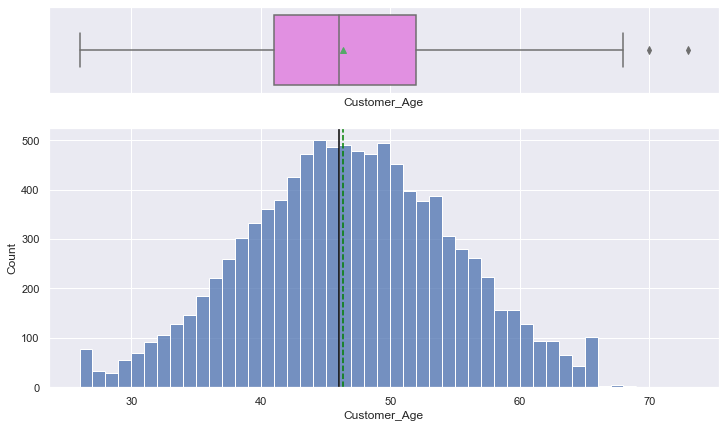

<IPython.core.display.Javascript object>

In [226]:
# Observations on Customer_age
histogram_boxplot(data, "Customer_Age")

- The distribution of age is normal
- No major outliers and no further treatment is required,

### Observation on Credit Limit

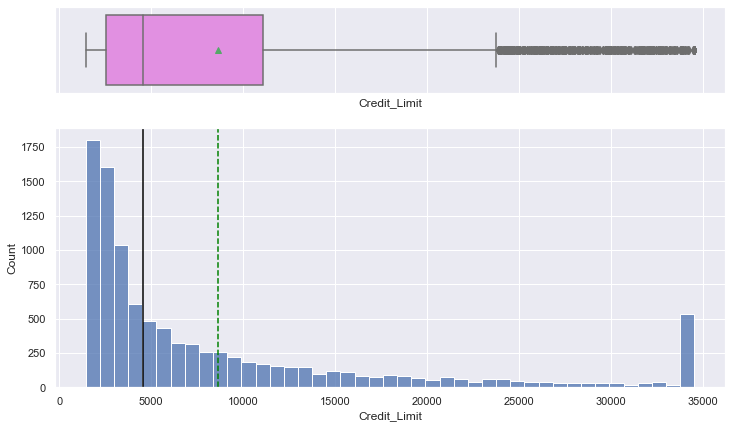

<IPython.core.display.Javascript object>

In [227]:
histogram_boxplot(data, "Credit_Limit")

- The distribution of the credit limit is right-skewed
- The boxplot shows that there are outliers at the right end
- A log normal will be applied to fix it.

### Observations on Total Revolving Balance

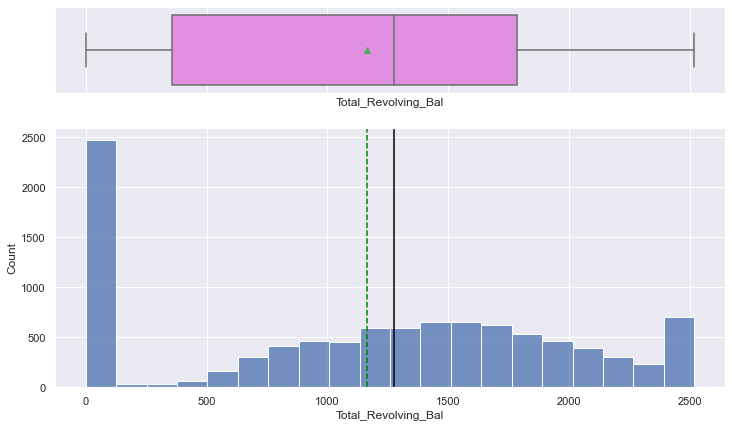

<IPython.core.display.Javascript object>

In [228]:
histogram_boxplot(data, "Total_Revolving_Bal")

- Lot many data at 0 is an outlier with normal distribution.
- We will not treat these outliers as they represent the real market trend

In [229]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on Attrition_Flag

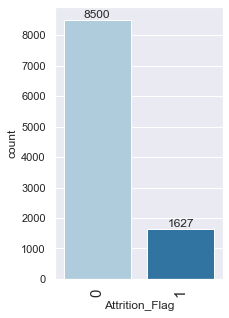

<IPython.core.display.Javascript object>

In [230]:
# observations on Risk
labeled_barplot(data, "Attrition_Flag")

- As mentioned earlier, the class distribution in the target variable is imbalanced.
- We have 85% observations who are existing customers and 15% custoerm who has attrited.

### Observations on Gender

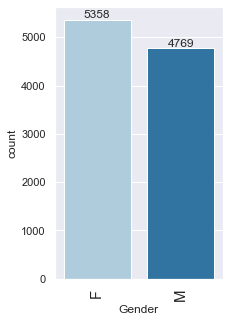

<IPython.core.display.Javascript object>

In [231]:
# observations on Sex
labeled_barplot(data, "Gender")

- Male customers are taking less credit than female customers
- There are approx 47% male customers and  53% are the female customers

### Observations on Education level

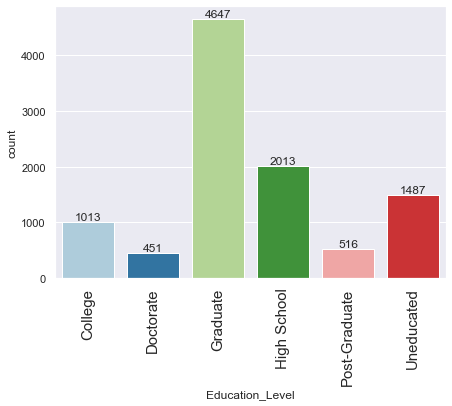

<IPython.core.display.Javascript object>

In [232]:
# observations on Housing
labeled_barplot(data, "Education_Level")

- Majority are graduates.
- Very few are doctorate and sizable count is uneducated as well.

### Observations on Marital Status

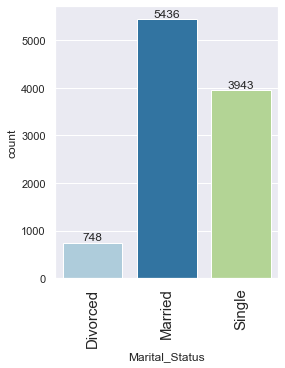

<IPython.core.display.Javascript object>

In [233]:
# observations on Job
labeled_barplot(data, "Marital_Status")

- Majority of customers are married.
- Rest are categoried as single(unmarried before) and divorced.

### Observations on Card category

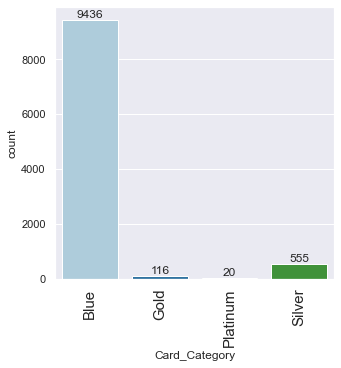

<IPython.core.display.Javascript object>

In [234]:
# observations on Saving accounts
labeled_barplot(data, "Card_Category")

- Majority (~94%) has blue card and very few has platinum card.
- Silver is number 2nd followed by gold.

### Apply log-normal to skewed numerical columns

In [235]:
for column in [
    "Credit_Limit",
    "Avg_Open_To_Buy",
    "Total_Trans_Amt",
]:
    try:
        data[column] = np.log10(data[column])
    except (ValueError, AttributeError):
        pass

<IPython.core.display.Javascript object>

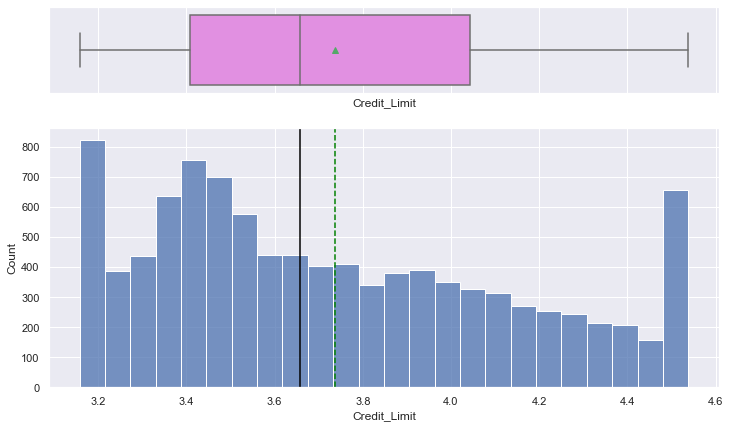

<IPython.core.display.Javascript object>

In [236]:
histogram_boxplot(data, "Credit_Limit")  # just check to confirm

## Bivariate Analysis

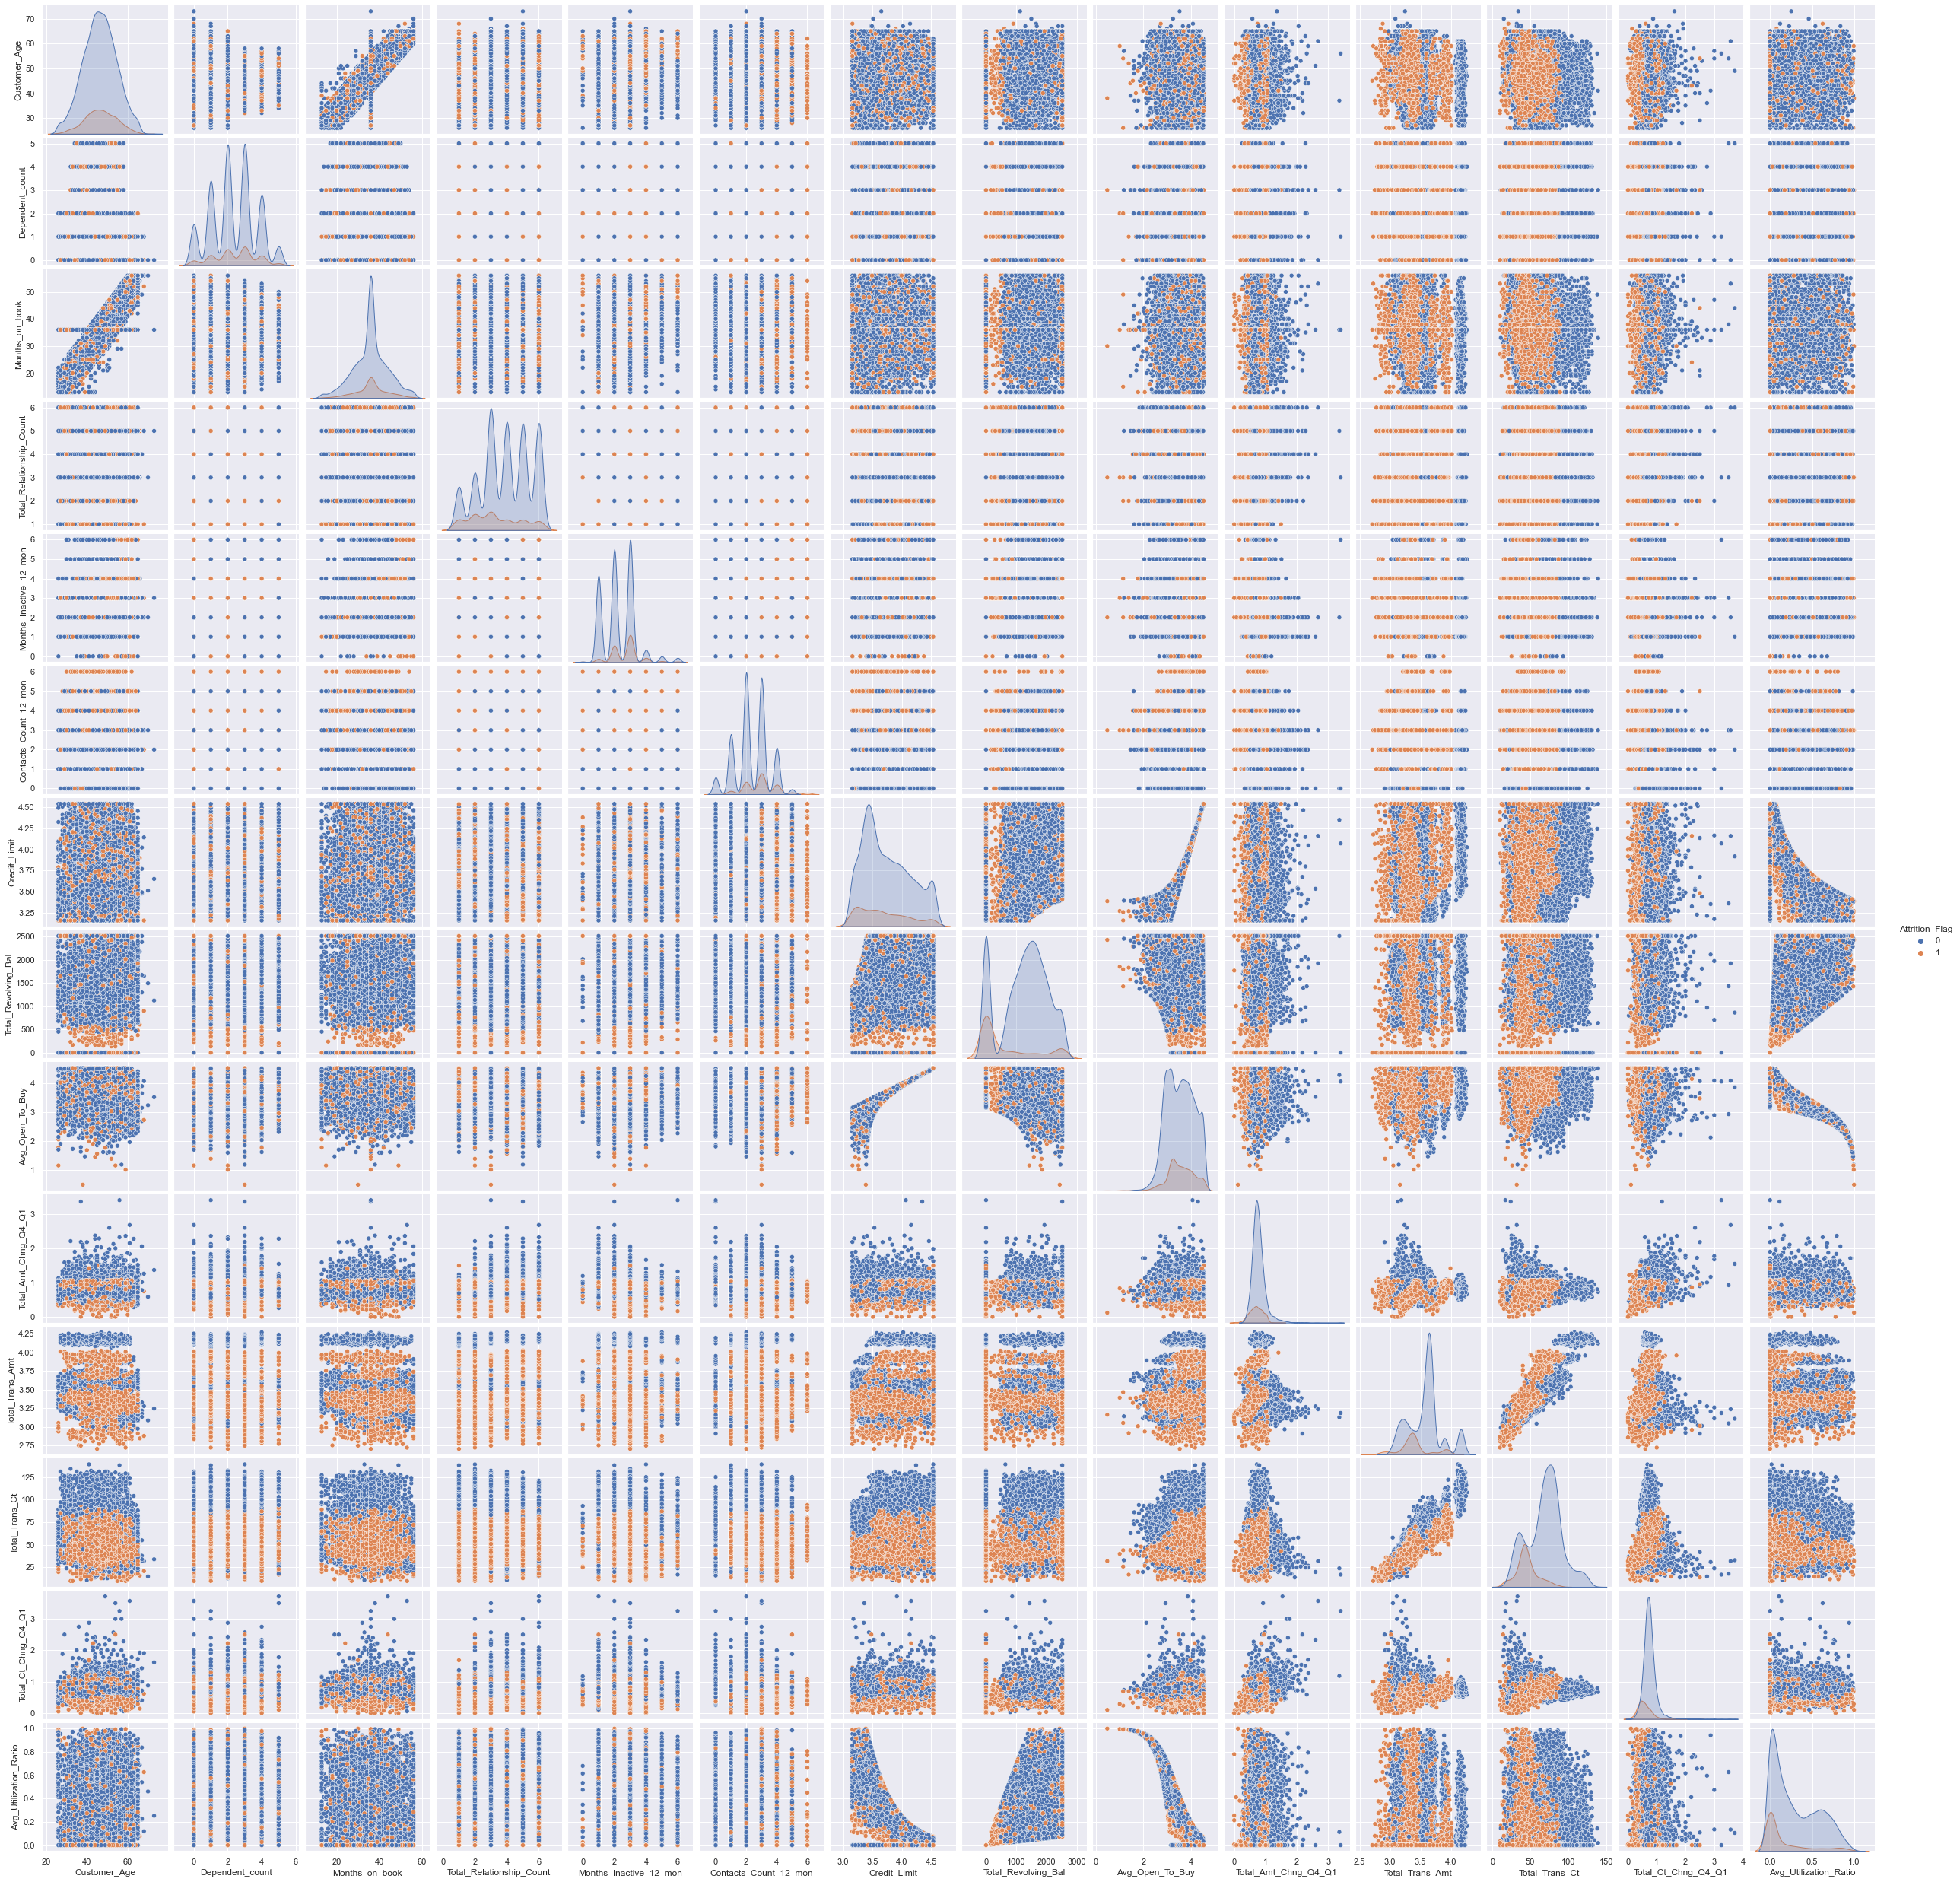

<IPython.core.display.Javascript object>

In [237]:
sns.pairplot(data, hue="Attrition_Flag")

- There are overlaps i.e. no clear distinction in the distribution of variables.
- Let's explore this further with the help of other plots.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Customer_Age'>

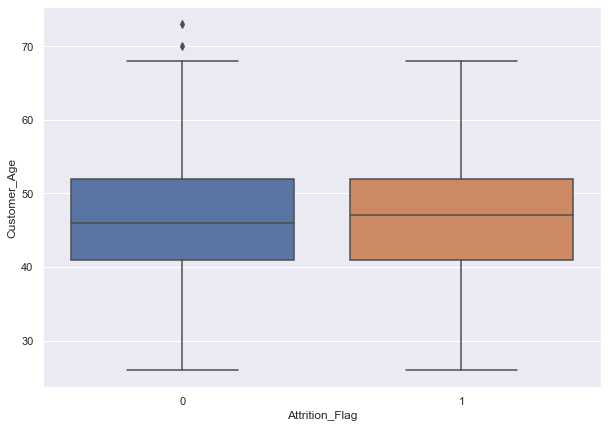

<IPython.core.display.Javascript object>

In [238]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Customer_Age", data=data, orient="vertical")

- We can see that the median age of attrited is higher than existing customers.
- This shows that younger customers are more likely to stay.
- There are some outliers in boxplots of existing customer distribution.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

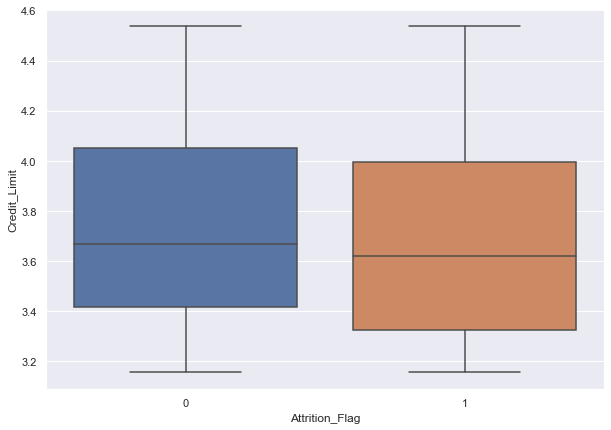

<IPython.core.display.Javascript object>

In [239]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Credit_Limit", data=data, orient="vertical")

- It can be seen that customers who atrrited has lower credit limit than existing customers.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Amt'>

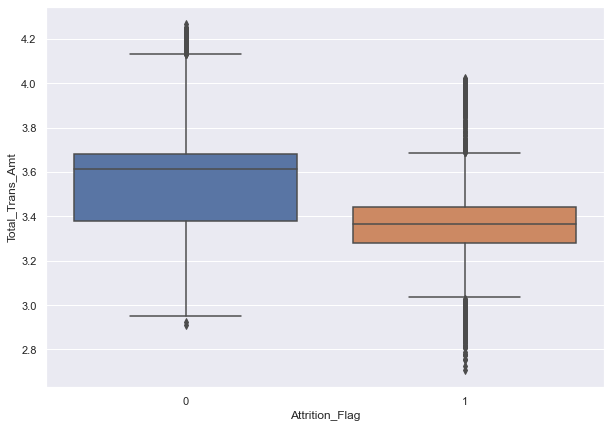

<IPython.core.display.Javascript object>

In [240]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Amt", data=data, orient="vertical")

- It can be seen that customers who atrrited has lower trasanction amount in general.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

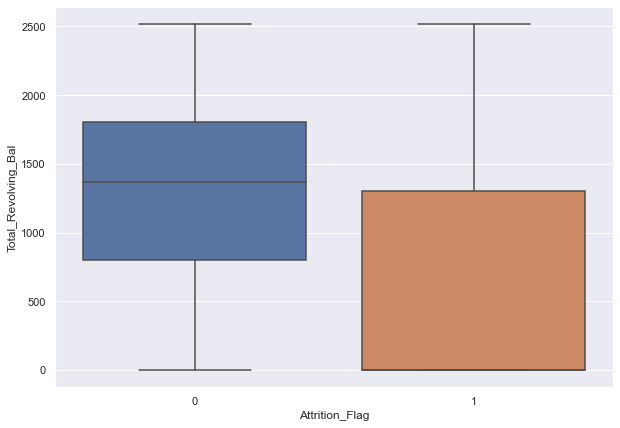

<IPython.core.display.Javascript object>

In [241]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Total_Revolving_Bal", data=data, orient="vertical")

- Customers who have attrited has lower revolving balance.

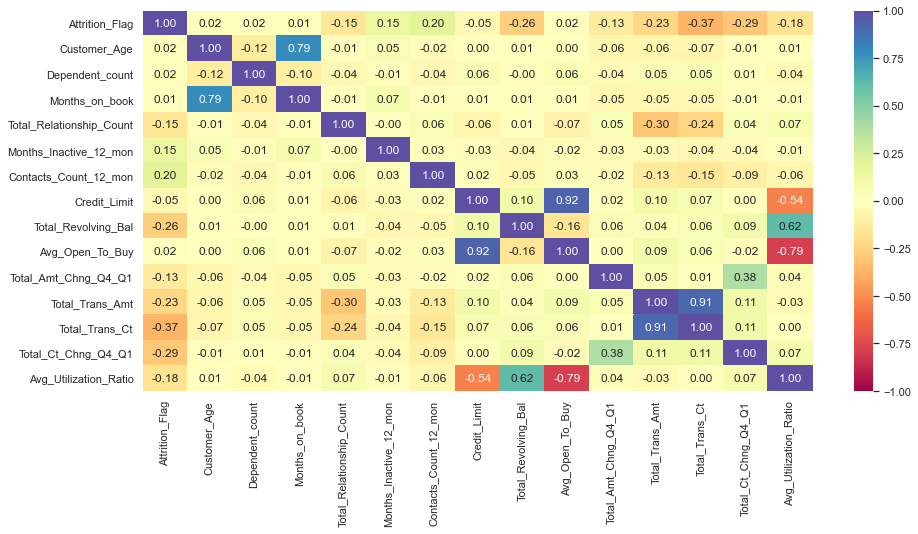

<IPython.core.display.Javascript object>

In [242]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Not many strong correlation seen in the heatmap.
- Months on the book has stron correlation with customer age.
- Total revolving balance & avg_utilization_ratio has strong positive correlation.

### Data Preparation for Modeling

### Split data

In [243]:
df = data.copy()

<IPython.core.display.Javascript object>

In [244]:
df = pd.get_dummies(
    df,
    columns=[
        "Gender",
        "Education_Level",
        "Marital_Status",
        "Income_Category",
        "Card_Category",
    ],
    drop_first=True,
)

<IPython.core.display.Javascript object>

In [245]:
y = df["Attrition_Flag"]
X = df.drop(["Attrition_Flag"], axis=1)

<IPython.core.display.Javascript object>

In [246]:
print(X.shape, y.shape)

(10127, 29) (10127,)


<IPython.core.display.Javascript object>

In [247]:
X.info()
print(y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_Age                   10127 non-null  int64  
 1   Dependent_count                10127 non-null  int64  
 2   Months_on_book                 10127 non-null  int64  
 3   Total_Relationship_Count       10127 non-null  int64  
 4   Months_Inactive_12_mon         10127 non-null  int64  
 5   Contacts_Count_12_mon          10127 non-null  int64  
 6   Credit_Limit                   10127 non-null  float64
 7   Total_Revolving_Bal            10127 non-null  int64  
 8   Avg_Open_To_Buy                10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1           10127 non-null  float64
 10  Total_Trans_Amt                10127 non-null  float64
 11  Total_Trans_Ct                 10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1            10127 non-null 

<IPython.core.display.Javascript object>

In [248]:
X.describe().T

count     mean     std    min     25%  \
Customer_Age                  10127.000   46.326   8.017 26.000  41.000   
Dependent_count               10127.000    2.346   1.299  0.000   1.000   
Months_on_book                10127.000   35.928   7.986 13.000  31.000   
Total_Relationship_Count      10127.000    3.813   1.554  1.000   3.000   
Months_Inactive_12_mon        10127.000    2.341   1.011  0.000   2.000   
Contacts_Count_12_mon         10127.000    2.455   1.106  0.000   2.000   
Credit_Limit                  10127.000    3.736   0.406  3.158   3.407   
Total_Revolving_Bal           10127.000 1162.814 814.987  0.000 359.000   
Avg_Open_To_Buy               10127.000    3.546   0.570  0.477   3.122   
Total_Amt_Chng_Q4_Q1          10127.000    0.760   0.219  0.000   0.631   
Total_Trans_Amt               10127.000    3.546   0.284  2.708   3.334   
Total_Trans_Ct                10127.000   64.859  23.473 10.000  45.000   
Total_Ct_Chng_Q4_Q1           10127.000    0.712   0.238  0.000   0.582   
Avg_Utilization_Ratio         10127.000    0.275   0.276  0.000   0.023   
Gender_M                      10127.000    0.471   0.499  0.000   0.000   
Education_Level_Doctorate     10127.000    0.045   0.206  0.000   0.000   
Education_Level_Graduate      10127.000    0.459   0.498  0.000   0.000   
Education_Level_High School   10127.000    0.199   0.399  0.000   0.000   
Education_Level_Post-Graduate 10127.000    0.051   0.220  0.000   0.000   
Education_Level_Uneducated    10127.000    0.147   0.354  0.000   0.000   
Marital_Status_Married        10127.000    0.537   0.499  0.000   0.000   
Marital_Status_Single         10127.000    0.389   0.488  0.000   0.000   
Income_Category_L2            10127.000    0.177   0.381  0.000   0.000   
Income_Category_L3            10127.000    0.138   0.345  0.000   0.000   
Income_Category_L4            10127.000    0.152   0.359  0.000   0.000   
Income_Category_L5            10127.000    0.072   0.258  0.000   0.000   
Card_Category_Gold            10127.000    0.011   0.106  0.000   0.000   
Card_Category_Platinum        10127.000    0.002   0.044  0.000   0.000   
Card_Category_Silver          10127.000    0.055   0.228  0.000   0.000   

                                   50%      75%      max  
Customer_Age                    46.000   52.000   73.000  
Dependent_count                  2.000    3.000    5.000  
Months_on_book                  36.000   40.000   56.000  
Total_Relationship_Count         4.000    5.000    6.000  
Months_Inactive_12_mon           2.000    3.000    6.000  
Contacts_Count_12_mon            2.000    3.000    6.000  
Credit_Limit                     3.658    4.044    4.538  
Total_Revolving_Bal           1276.000 1784.000 2517.000  
Avg_Open_To_Buy                  3.541    3.994    4.538  
Total_Amt_Chng_Q4_Q1             0.736    0.859    3.397  
Total_Trans_Amt                  3.591    3.676    4.267  
Total_Trans_Ct                  67.000   81.000  139.000  
Total_Ct_Chng_Q4_Q1              0.702    0.818    3.714  
Avg_Utilization_Ratio            0.176    0.503    0.999  
Gender_M                         0.000    1.000    1.000  
Education_Level_Doctorate        0.000    0.000    1.000  
Education_Level_Graduate         0.000    1.000    1.000  
Education_Level_High School      0.000    0.000    1.000  
Education_Level_Post-Graduate    0.000    0.000    1.000  
Education_Level_Uneducated       0.000    0.000    1.000  
Marital_Status_Married           1.000    1.000    1.000  
Marital_Status_Single            0.000    1.000    1.000  
Income_Category_L2               0.000    0.000    1.000  
Income_Category_L3               0.000    0.000    1.000  
Income_Category_L4               0.000    0.000    1.000  
Income_Category_L5               0.000    0.000    1.000  
Card_Category_Gold               0.000    0.000    1.000  
Card_Category_Platinum           0.000    0.000    1.000  
Card_Category_Silver             0.000    0.000    1.000

<IPython.core.display.Javascript object>

In [249]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


<IPython.core.display.Javascript object>

### Model evaluation criterion

### We will be using Recall as a metric for our model performance


In [250]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 78.68655154369439
Random forest: 75.81946624803767
GBM: 81.6567242281528
Adaboost: 82.16745159602303
Xgboost: 86.0638409209838
dtree: 78.48246991104133

Validation Performance:

Bagging: 0.8006134969325154
Random forest: 0.7944785276073619
GBM: 0.8558282208588958
Adaboost: 0.852760736196319
Xgboost: 0.9049079754601227
dtree: 0.8251533742331288


<IPython.core.display.Javascript object>

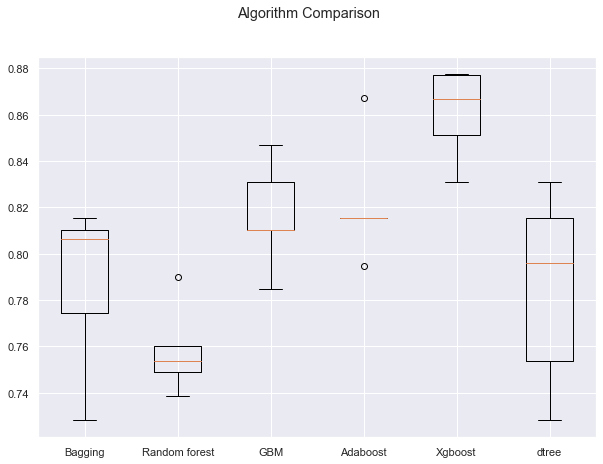

<IPython.core.display.Javascript object>

In [251]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that the Xgboost is giving the highest cross-validated recall followed by GBM
- The boxplot shows that the performance of Xgboost & GBM is consistent and their performance on the validation set is also good
- Next do oversampling & undersampling to check more performances.

# Oversampling and Undersampling the train data

## Oversampling train data using SMOTE

In [252]:
# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

<IPython.core.display.Javascript object>

In [253]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=0.4, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>


Cross-Validation Performance:

Bagging: 89.7008238184709
Random forest: 90.53427759310114
GBM: 90.43623837741485
Adaboost: 89.65168376933083
Xgboost: 93.82027749674808
dtree: 87.98501710266416

Validation Performance:

Bagging: 0.8650306748466258
Random forest: 0.8619631901840491
GBM: 0.8895705521472392
Adaboost: 0.8803680981595092
Xgboost: 0.8987730061349694
dtree: 0.7914110429447853


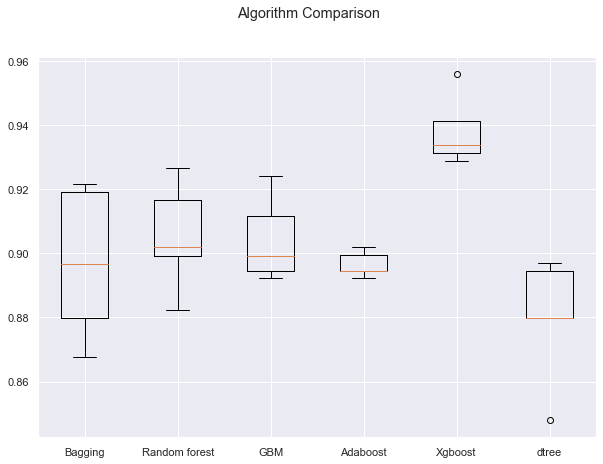

<IPython.core.display.Javascript object>

In [254]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))

# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- All previous models performance have significantly improved 
- Xgboost and Random Forest shows the best performance.

## Undersampling train data using Random Undersampler

In [255]:
# fit random under sampler on the train data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>


Cross-Validation Performance:

Bagging: 90.36944008372579
Random forest: 93.54631083202511
GBM: 93.95604395604396
Adaboost: 93.13762428048143
Xgboost: 94.98063840920985
dtree: 88.5243328100471

Validation Performance:

Bagging: 0.9294478527607362
Random forest: 0.9386503067484663
GBM: 0.9570552147239264
Adaboost: 0.9601226993865031
Xgboost: 0.950920245398773
dtree: 0.9079754601226994


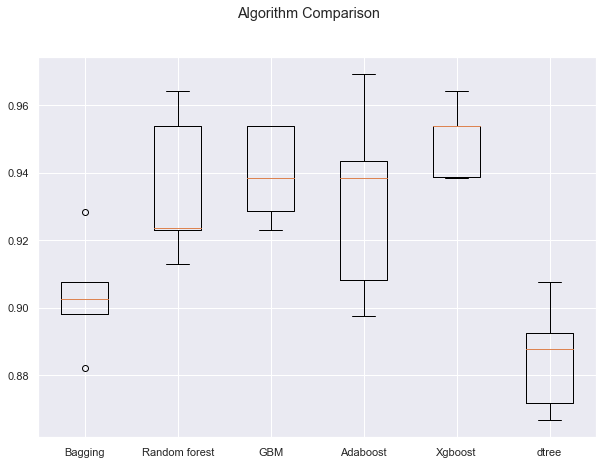

<IPython.core.display.Javascript object>

In [256]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))

# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- With undersampling, XGboost & Adaboost shows the best result.
- Validation scores are better than oversamples data , hence tuned results will be taken from this.
- Final 3 tuned model for hypermater tuning would be - Adaboost, Xgboost & GBM 

# Hyperparameter Tuning

**Adaboost, Xgboost & GBM models unsampled data using RandomizedSearchCV will be used further out of all 18 models. 

**First let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [257]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [258]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### RandomizedSearchCV

### 1. Tuning Unsampled Adaboost Classifer

In [259]:
# Creating pipeline
model = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 70, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.9436630036630037:


<IPython.core.display.Javascript object>

Training performance:
   Accuracy  Recall  Precision    F1
0     0.956   0.969      0.944 0.957
Validation performance:
   Accuracy  Recall  Precision    F1
0     0.930   0.972      0.704 0.817


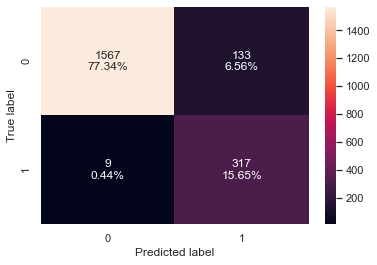

<IPython.core.display.Javascript object>

In [260]:
# Set the clf to the best combination of parameters
dtc = DecisionTreeClassifier(max_depth=2, random_state=1)
adaboost_tuned = AdaBoostClassifier(
    n_estimators=70, learning_rate=0.1, base_estimator=dtc, random_state=1,
)

# Fit the best algorithm to the data.
adaboost_tuned.fit(X_train_un, y_train_un)

# Calculating different metrics on train set
adaboost_random_train = model_performance_classification_sklearn(
    adaboost_tuned, X_train_un, y_train_un
)
print("Training performance:")
print(adaboost_random_train)

# Calculating different metrics on validation set
adaboost_random_val = model_performance_classification_sklearn(
    adaboost_tuned, X_val, y_val
)
print("Validation performance:")
print(adaboost_random_val)

# creating confusion matrix
confusion_matrix_sklearn(adaboost_tuned, X_val, y_val)

- Recall has slightly increased for validation set compared to cross-validated set.
- Recall is quite good and suggest model is giving quite good performance.

### 2. Tuning Unsampled Xgboost

In [261]:
# Creating pipeline
model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in GridSearchCV
param_grid = {
    "n_estimators": np.arange(50, 150, 50),
    "scale_pos_weight": [2, 5, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.05],
    "gamma": [0, 1, 3, 5],
    "subsample": [0.8, 0.9, 1],
    "max_depth": np.arange(1, 5, 1),
    "reg_lambda": [5, 10],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 1, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9989743589743589:


<IPython.core.display.Javascript object>

Training performance:
   Accuracy  Recall  Precision    F1
0     0.607   1.000      0.560 0.718
Validation performance:
   Accuracy  Recall  Precision    F1
0     0.330   1.000      0.194 0.325


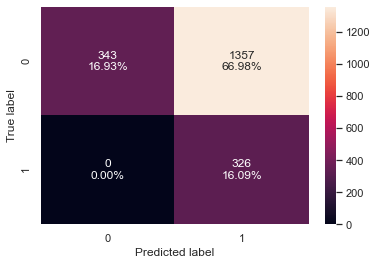

<IPython.core.display.Javascript object>

In [262]:
# building model with best parameters
xgb_tuned = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    subsample=0.9,
    learning_rate=0.1,
    gamma=5,
    eval_metric="logloss",
    reg_lambda=10,
    max_depth=1,
)

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_un, y_train_un)

# Calculating different metrics on train set
xgb_random_train = model_performance_classification_sklearn(
    xgb_tuned, X_train_un, y_train_un
)
print("Training performance:")
print(xgb_random_train)

# Calculating different metrics on validation set
xgb_random_val = model_performance_classification_sklearn(xgb_tuned, X_val, y_val)
print("Validation performance:")
print(xgb_random_val)

# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

- Recall is 1.0 but accuracy and precision is quite bad.
- This is suggesting model is overfitting 

### 3. Tuning Unsampled GBM (Gradient Boosting Classifier)

In [263]:
# Creating pipeline
model = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample": [0.8, 0.9, 1],
    "max_depth": np.arange(1, 5, 1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 1, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2} with CV score=0.950821559392988:


<IPython.core.display.Javascript object>

Training performance:
   Accuracy  Recall  Precision    F1
0     0.991   0.993      0.989 0.991
Validation performance:
   Accuracy  Recall  Precision    F1
0     0.946   0.972      0.758 0.852


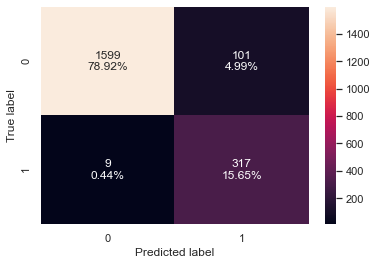

<IPython.core.display.Javascript object>

In [264]:
# building model with best parameters
gbm_tuned = GradientBoostingClassifier(
    random_state=1, n_estimators=100, subsample=1.0, learning_rate=0.2, max_depth=3,
)
# Fit the model on training data
gbm_tuned.fit(X_train_un, y_train_un)

# Calculating different metrics on train set
gbm_random_train = model_performance_classification_sklearn(
    gbm_tuned, X_train_un, y_train_un
)
print("Training performance:")
print(gbm_random_train)

# Calculating different metrics on validation set
gbm_random_val = model_performance_classification_sklearn(gbm_tuned, X_val, y_val)
print("Validation performance:")
print(gbm_random_val)

# creating confusion matrix
confusion_matrix_sklearn(gbm_tuned, X_val, y_val)

- Recall is quite good along with other parameters similar to adaboost

### Comparing all 3 models from RandomisedsearchCV

In [265]:
# training performance comparison

models_train_comp_df = pd.concat(
    [adaboost_random_train.T, xgb_random_train.T, gbm_random_train.T,], axis=1,
)

models_train_comp_df.columns = [
    "Adaboost Tuned with Random search",
    "Xgboost Tuned with Random search",
    "GBM Tuned with Random Search",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Adaboost Tuned with Random search  \
Accuracy                               0.956   
Recall                                 0.969   
Precision                              0.944   
F1                                     0.957   

           Xgboost Tuned with Random search  GBM Tuned with Random Search  
Accuracy                              0.607                         0.991  
Recall                                1.000                         0.993  
Precision                             0.560                         0.989  
F1                                    0.718                         0.991

<IPython.core.display.Javascript object>

In [266]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [adaboost_random_val.T, xgb_random_val.T, gbm_random_val.T,], axis=1,
)

models_val_comp_df.columns = [
    "Adaboost Tuned with Random search",
    "Xgboost Tuned with Random search",
    "GBM Tuned with Random Search",
]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


Adaboost Tuned with Random search  \
Accuracy                               0.930   
Recall                                 0.972   
Precision                              0.704   
F1                                     0.817   

           Xgboost Tuned with Random search  GBM Tuned with Random Search  
Accuracy                              0.330                         0.946  
Recall                                1.000                         0.972  
Precision                             0.194                         0.758  
F1                                    0.325                         0.852

<IPython.core.display.Javascript object>

- GBM shows the best perormance scores followed by Adaboost on validation set.
- Xgboost shows lower precision & accuracy
- Final chosen model is GBM Unsampled data.

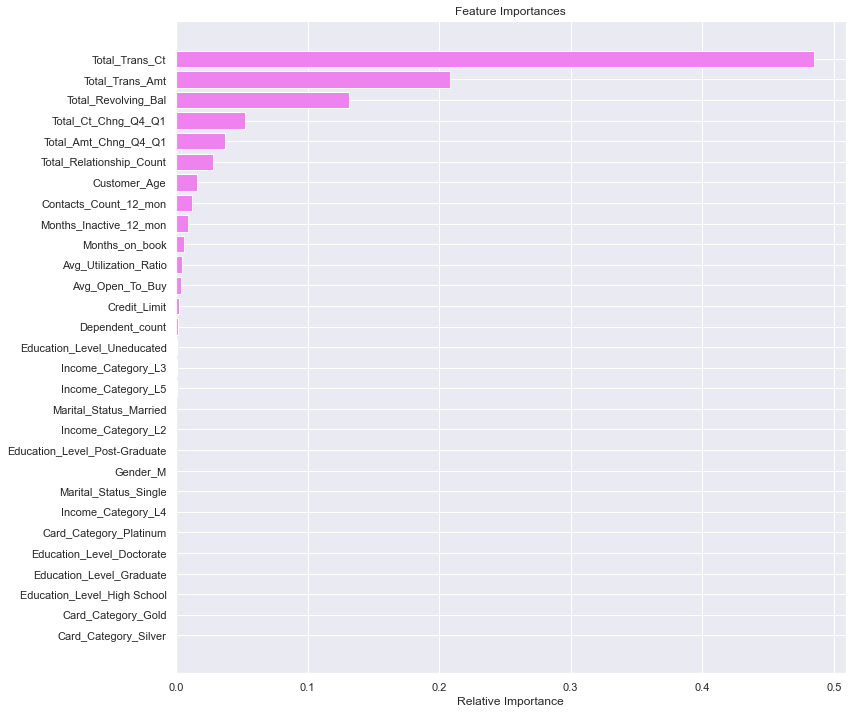

<IPython.core.display.Javascript object>

In [267]:
feature_names = X_train.columns
importances = gbm_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total transaction count, amount & revolving balance are top 3 features. 
- These features also shows good correlation in heatmaps.
- Customer age also seems to show some influence.
- Education level, card category amd marital status has very low feature improtance in the model

## Pipelines for productionizing the model
- Now, we have a final model. let's use pipelines to put the model into production


In [268]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(7088, 29) (3039, 29)


<IPython.core.display.Javascript object>

In [269]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        (
            "GBM",
            GradientBoostingClassifier(
                random_state=1,
                n_estimators=100,
                subsample=1.0,
                learning_rate=0.2,
                max_depth=3,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('GBM',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            random_state=1))])

<IPython.core.display.Javascript object>

Train performance:
   Accuracy  Recall  Precision    F1
0     0.987   0.944      0.972 0.958
Test performance:
   Accuracy  Recall  Precision    F1
0     0.972   0.889      0.931 0.910


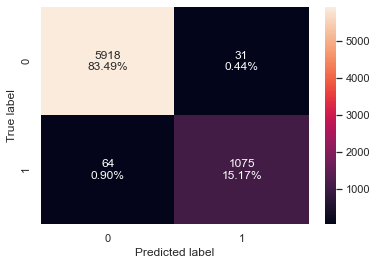

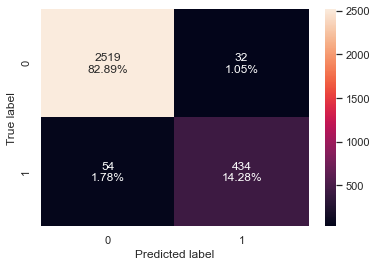

<IPython.core.display.Javascript object>

In [270]:
# Calculating different metrics on training set
gbm_train = model_performance_classification_sklearn(model, X_train, y_train)
print("Train performance:")
print(gbm_train)

# creating confusion matrix
confusion_matrix_sklearn(model, X_train, y_train)

# Calculating different metrics on test set
gbm_test = model_performance_classification_sklearn(model, X_test, y_test)
print("Test performance:")
print(gbm_test)

# creating confusion matrix
confusion_matrix_sklearn(model, X_test, y_test)

## Conclusion and Insights

- The best test recall is ~89% with good precision (93%) and F1-score(91%). This means that the model is good at identifying the reasons/predictors for customer attrition. 
- Customers with lower transaction amount and revolving balance have attrited more. So bank should focus on such customers and provide more incentive to make them stay.
- Income category, Marital Status, Card category and Education Qualification shows very less influence for attrition.
- Customer age shows some influence and it is seen that higher age customers have atrrited more.